In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import scipy.signal as scsig
import scipy.io as scio
import h5py
import sharpy.utils.h5utils as h5utils
import sharpy.utils.algebra as algebra
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
with h5py.File('./05_AeroFrequencyResponse/output/simple_HALE_uvlm_delta_ntb_mix_alpha0400_lm1/frequencyresponse/aerodynamic.freqresp.h5', 'r') as f:
    fom = h5utils.load_h5_in_dict(f)

In [3]:
with h5py.File('./04_AeroROM/output/simple_HALE_uvlm_delta_ntb_mix_alpha0400_lm1_rom1_nmodes20/frequencyresponse/aerodynamic.freqresp.h5', 'r') as f:
    rom = h5utils.load_h5_in_dict(f)

In [9]:
np.max(np.abs(fom['response'][:, :, 0].__abs__() - rom['response'][:, :, 0].__abs__()))

3.744393684002034e-10

In [16]:

m = -4
for p in range(20):
    print('Output', p)
    print('Actual', fom['response'][p, m, 0].real)
    dreal = fom['response'][p, m, 0].real - rom['response'][p, m, 0].real
    dimag = fom['response'][p, m, 0].imag - rom['response'][p, m, 0].imag

    print(dreal)
    print(dimag)

Output 0
Actual -0.6313105143617868
2.1755486301344718e-11
0.0
Output 1
Actual -5.3608965237365345
1.2745093869170887e-10
0.0
Output 2
Actual 2.0615686182164545e-16
1.3317768928079138e-12
0.0
Output 3
Actual 2.2130712403532358e-15
1.1791575397530415e-12
0.0
Output 4
Actual -2.4399883982806007e-15
-1.3377547199679293e-12
0.0
Output 5
Actual -26.057276629031698
4.82458517581108e-12
0.0
Output 6
Actual 0.0
0.0
0.0
Output 7
Actual 0.0
0.0
0.0
Output 8
Actual 0.0
0.0
0.0
Output 9
Actual -0.18404545326900906
1.4732723374599743e-10
0.0
Output 10
Actual -1.8120594834983505e-07
-7.0577843844875976e-12
0.0
Output 11
Actual -0.10928453809483674
8.658267158789812e-11
0.0
Output 12
Actual -3.2109280942249616
-5.932232483019106e-11
0.0
Output 13
Actual 2.72616772787308e-08
-3.113368778104021e-12
0.0
Output 14
Actual -2.4605568993353137e-07
-2.8733713793649585e-12
0.0
Output 15
Actual 1.275342741595342e-06
-5.1495519858980984e-14
0.0
Output 16
Actual -1.2766238727399621
-7.785772027091298e-11
0.0
Out

In [28]:
rom = scio.loadmat('./04_AeroROM/output/simple_HALE_uvlm_delta_ntb_mix_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_delta_ntb_mix_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_delta_ntb_mix_alpha0400_lm1_rom1_nmodes20.linss.mat')


In [29]:
rom['forces_aero_beam_dof'][:9]

array([[-8.52550326e-02, -8.96782738e-01,  3.69444191e-18,
        -1.27555769e-16, -2.19959081e-17, -4.69415843e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.03601182e-01, -6.39212514e-09, -6.87948584e-01,
        -9.57621114e-02, -2.67414587e-07, -1.14200940e-07,
        -2.07090681e-07, -1.56119230e-01, -4.00405597e-01,
         4.73390226e-08, -2.80719737e-01]])

# ROM at alpha trim

In [84]:
rom = scio.loadmat('./04_AeroROM/output/AFRAME____simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20/AFRAME____simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20/AFRAME____simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20.linss.mat')
uvlm = scio.loadmat('./04_AeroROM/output/AFRAME____simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20/AFRAME____simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20/AFRAME____simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20.uvlmss.mat')




In [85]:
rom['forces_aero_beam_dof'].shape

(1, 20)

In [86]:
rom['mode_shapes'][-9:, :6] 

array([[0.11304668, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.11304668, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11304668, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.02210252, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.05683173,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02074477],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [87]:
np.diag(rom['mode_shapes'][-9:, :6])

array([0.11304668, 0.11304668, 0.11304668, 0.02210252, 0.05683173,
       0.02074477])

In [88]:
f0 = rom['forces_aero_beam_dof'][0, :6] / np.diag(rom['mode_shapes'][-9:, :6])

In [89]:
delta_elev = -0.7585 * np.pi/180

In [90]:
H = uvlm['C'].dot(np.linalg.inv(np.eye(uvlm['A'].shape[0]) - uvlm['A']).dot(uvlm['B'])) + uvlm['D']

In [91]:
delta_index = -4
u = np.zeros(uvlm['B'].shape[1])
u[delta_index] = delta_elev
df = H.dot(u)

In [99]:
elev_force = df.real[:6] * 0.5 * 1.225 * 0.5 **2 / np.diag(rom['mode_shapes'][-9:, :6])
print(elev_force)

[ 3.79763349e-03  1.64674289e-14 -9.70703998e-02 -3.35098355e-13
  9.51175254e-01  7.17883727e-14]


# ROM at alpha trim with elevator deflection

In [93]:
rom = scio.loadmat('./04_AeroROM/output/AFRAME_ELEV___simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20/' +
                   '/AFRAME_ELEV___simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20/AFRAME_ELEV___simple_HALE_uvlm_delta_ntb_scaled_alpha380.84_lm1_rom1_nmodes20.linss.mat')



In [94]:
fe = rom['forces_aero_beam_dof'][0, :6] / np.diag(rom['mode_shapes'][-9:, :6])

In [95]:
df_nl = fe - f0

In [96]:
print(df_nl)

[ 4.09098906e-03 -2.25959591e-16 -9.79670037e-02 -1.41661983e-14
  9.60895898e-01  1.77360970e-16]


In [100]:
print(df_nl - elev_force)

[ 2.93355566e-04 -1.66933885e-14 -8.96603865e-04  3.20932156e-13
  9.72064363e-03 -7.16110117e-14]


In [101]:
print(fe)

[-4.53164625e-01 -2.79292174e-16  7.47660502e+00  1.76711427e-14
 -3.01615441e+00  2.19819651e-15]


In [102]:
import sharpy.utils.algebra as algebra

In [104]:
cag = algebra.euler2rot(np.array([0, 3.8084 * np.pi/180, 0])).T

In [115]:
mg = cag.dot([0, 0, -78.25 * 9.81])
mg

array([  50.98629268,    0.        , -765.93736886])

In [107]:
xcga = np.array([0.42, 0.00, 0.11])

In [109]:
mom_weight = np.cross(xcga, mg)

In [110]:
mom_weight

array([ -0.        , 327.30218712,   0.        ])

In [116]:
FM_weight = np.concatenate((mg, mom_weight))

In [122]:
fe * 100 + FM_weight + np.array([-3.5363, 0, 0, 0, 0, 0])

array([ 2.13353021e+00, -2.79292174e-14, -1.82768670e+01,  1.76711427e-12,
        2.56867463e+01,  2.19819651e-13])

In [118]:
fe

array([-4.53164625e-01, -2.79292174e-16,  7.47660502e+00,  1.76711427e-14,
       -3.01615441e+00,  2.19819651e-15])

In [119]:
FM_weight

array([  50.98629268,    0.        , -765.93736886,   -0.        ,
        327.30218712,    0.        ])

# Verification of input scaling

In [123]:
path_to_results = './04_AeroROM/output/'
scaled_sys_name = 'TEST_simple_HALE_uvlm_delta_ntb_scaled_alpha0400_lm1_rom1_nmodes20'
nominal_sys_name = 'TEST_simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20'

In [133]:
def load_sys(sys_name, path):
    sys = scio.loadmat(path + '/' + sys_name + '/{:s}/{:s}.linss.mat'.format(sys_name, sys_name))
    uvlm = scio.loadmat(path + '/' + sys_name + '/{:s}/{:s}.uvlmss.mat'.format(sys_name, sys_name))
    
    return sys, uvlm

In [143]:
systems = {}
systems['scaled'] = {'name': scaled_sys_name,
                    'scaled': True}
systems['nominal'] = {'name': nominal_sys_name,
                     'scaled': False}

In [179]:
for sys_type in systems.values():
    sys, uvlm = load_sys(sys_type['name'], path_to_results)
    sys_type['sys'] = sys
    sys_type['uvlm'] = uvlm
    
    sys_type['H0'] = uvlm['C'].dot(np.linalg.inv(np.eye(uvlm['A'].shape[0]) - uvlm['A']).dot(uvlm['B'])) + uvlm['D']

In [180]:
rho = 1.225
u_inf = 10
b_chord = 0.5

In [260]:
def eval_sys(H, force_mode, *input_values):
    u = np.zeros(H.shape[1])
    for ind_val in input_values:
        index = ind_val[0]
        value = ind_val[1]
        mode_scaling = ind_val[2]
    
        u[index] = value / mode_scaling

    df = H.dot(u)[:3].real / force_mode
    
    return df

In [269]:
theta_index = 27
theta_value = 1 * np.pi/180
via = 'angle'
alpha0 = 4 * np.pi/180
n_evals = 6

# for sys_type in systems.values():
lift_and_drag = np.zeros((n_evals, 4))
sys_type = systems['scaled']
for i_iter, theta_value in enumerate(np.linspace(-4, 1, n_evals) * np.pi/180):
    force_mode = sys_type['sys']['mode_shapes'][-9, 0]
    
    if via == 'angle':
        in_mode_scaling = sys_type['sys']['mode_shapes'][-2, 7]
        df = eval_sys(sys_type['H0'], force_mode, ((theta_index, theta_value * scaling, in_mode_scaling)))
    else:
        V0 = np.array([-1, 0, 0], dtype=float) * u_inf  #G
        Vp = u_inf * np.array([-np.cos(theta_value), 0 , -np.sin(theta_value)])  #G
    
        dvg = Vp - V0  # G
#         dvg = np.array([-np.cos(theta_value), 0, -np.sin(theta_value)])
        cga = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha0, 0])))
        dva = cga.T.dot(dvg)  # A
        if sys_type['scaled']:
            dva /= u_inf / b_chord
            
        df = eval_sys(sys_type['H0'], force_mode, (20, dva[0], force_mode), (22, dva[2], force_mode))

    if sys_type['scaled']:
        df *= 0.5 *rho * u_inf ** 2 * b_chord ** 2
#     print('delta_fa', df, '\n')
    
    # Transformation to lift and drag
    f0a = sys_type['sys']['forces_aero_beam_dof'][0, :3] / force_mode
    ld0 = cga.dot(f0a)

    
    if via == 'angle':
        ld = ld0 + algebra.der_Ceuler_by_v(np.array([0, alpha0, 0]), f0a).dot(np.array([0, theta_value, 0])) + cga.dot(df)
    else: 
        ld = ld0 + algebra.der_Ceuler_by_v(np.array([0, alpha0, 0]), f0a).dot(np.array([0, theta_value, 0])) + cga.dot(df)  # stability axes

    lift_and_drag[i_iter, 0] = (alpha0 + theta_value) * 180 / np.pi
    lift_and_drag[i_iter, 1:] = ld

5.815947152700961
0.07432631392223557


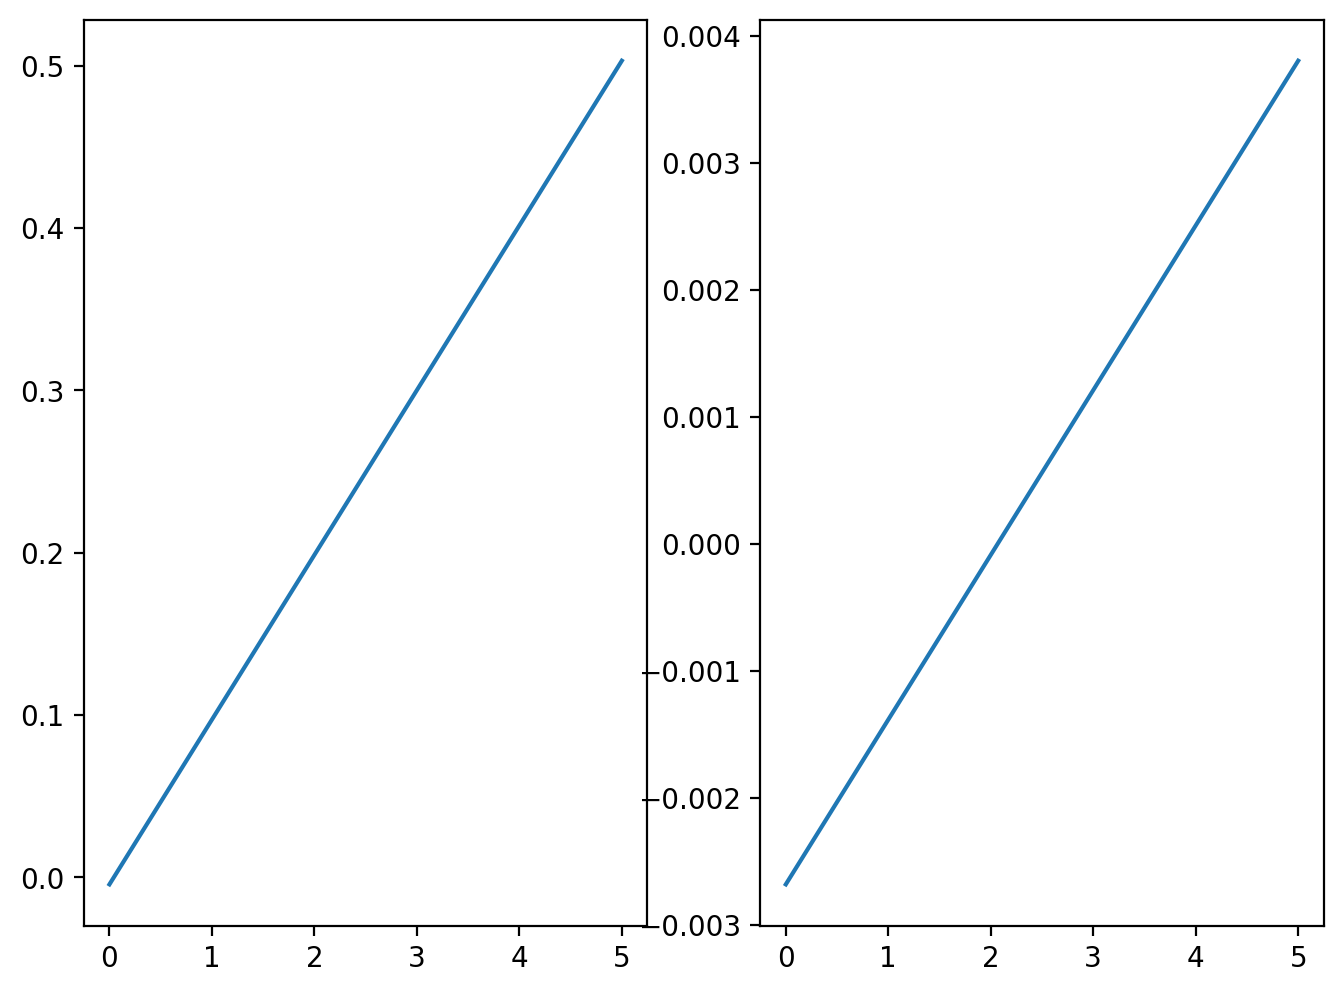

In [270]:
fig, ax = plt.subplots(ncols=2)
for i in range(2):
    if i == 0:
        index_force = 3
    else:
        index_force = 1

    ax[i].plot(lift_and_drag[:, 0], lift_and_drag[:, index_force] / (0.5 * rho * u_inf**2 * 32))
    
    slope = (lift_and_drag[-1, index_force] - lift_and_drag[0, index_force]) / (0.5 * rho * u_inf**2 * 32) / ((lift_and_drag[-1, 0] - lift_and_drag[0, 0]) * (np.pi/180))
    print(slope)

In [194]:
algebra.der_Ceuler_by_v(np.array([0, alpha0, 0]), sys_type['sys']['forces_aero_beam_dof'][0, :3]).dot(np.array([0, theta_value, 0]))

array([ 1.55290997,  0.        , -0.00969877])

In [193]:
cga.dot(df)

array([-1.26547880e+00,  1.97249566e-14,  2.25008516e+01])